# Synthetic Accesibility Scores for COVID submissions

In [1]:
import numpy as np
import pandas as pd

In [2]:
import PIL #needed for IPythonConsole

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem

RDKit WARNING: [02:53:10] Enabling RDKit 2019.09.3 jupyter extensions


In [5]:
from os import listdir
from os.path import isfile, join
plans_path = './covid_synthesis_plans/'
html_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [48]:
syn_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1USA9yJ7CuCjQkqkqIQ2oEBCE-uhM6kLWWXUhBBiMo_c/export?gid=0&format=csv')
syn_df.head()

,SMILES,CID,creator,rationale,fragments,real_space,SCR,BB,link,covalent_frag,SA_score,avg_sa_score,MATT Comments,ALPHA comments
0,Clc1ccc(Cn2c(CN3CCCC3)nc3ccccc32)cc1,AME-NAT-624-1,"Ameya D Bendre, National centre for cell science",The molecule is clemizole (Not newly designed ...,x0072,FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/624...,False,1.829810,1.829810,NaN,NaN
1,N#Cc1cccc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7-1,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",Z195739680,Z195739680,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,1.836199,1.842151,NaN,NaN
2,O=C(Nc1cccnc1)Nc1cc(Cl)cc(Cl)c1,WAR-XCH-eb7-3,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,1.857217,1.842151,NaN,NaN
3,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7-2,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,2.052798,1.842151,NaN,NaN
4,O=C(Nc1cccnc1)Nc1cc(O)cc(Cl)c1,WAR-XCH-eb7-4,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,1.999026,1.842151,NaN,NaN


In [64]:
smi_list = []
mw_list = []
cids_list = []
links_list = []
html_file_list = []

available_list = []
probs_list = []
sms = []

for html_file in html_files:
    cid = html_file.split('.html')[0].split('_')[0]
    cids_list.append(cid)
    smi = list(syn_df.loc[syn_df['CID']==cid]['SMILES'])[0]
    smi_list.append(smi)
    links_list.append(list(syn_df.loc[syn_df['CID']==cid]['link'])[0])
    
    mw_list.append(Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smi)))
    
    html_file_list.append(f'./covid_synthesis_plans/{html_file}')
    
    with open('./covid_synthesis_plans/' + html_file, 'r') as f:
        data = f.readlines()
        
    all_available = True
    mol_ids = []
    for line in data:
        mol_ids = []
        if 'OVERALL PROB:' in line:
            prob = line.split('</p>')[0].split('OVERALL PROB:')[-1].strip()
            probs_list.append(float(prob))
        if ' = ' in line:
            sublines = line.split("</p>")
            for subline in sublines:
                if ((len(subline) >0) and ('Stock' not in subline) and ('Reactions' not in subline)
                    and ('*' not in subline)):
                    mol_id = subline.split(' = ')[-1]
                            
                    if 'EN' not in mol_id:
                        all_nums = True
                        for char in mol_id:
                            if char.isalpha():
                                all_nums = False
                        if all_nums:
                            all_available = False
                    else:
                        mol_ids.append(mol_id)
    available_list.append(all_available)
    sms.append(mol_ids)

In [67]:
sa_df = pd.DataFrame({
    'SMILES': smi_list,
    'MW': mw_list,
    'SCORE': probs_list,
    'BB': sms,
    'CID': cids_list,
    'LINK': links_list,
    'ROUTE': html_file_list
})

In [69]:
from rdkit.Chem import PandasTools

In [68]:
sa_df.head()

,SMILES,MW,SCORE,BB,CID,LINK,ROUTE
0,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,0.979,"[EN300-17271, EN300-21243]",ALE-HEI-f28-4,https://covid.postera.ai/covid/submissions/f28...,./covid_synthesis_plans/ALE-HEI-f28-4.html
1,O=C(Cc1ccccc1)N(Cc1cccnc1)C(=O)NC1CC1,309.147727,0.812,"[EN300-15619, EN300-18992]",MIC-SGC-657-1,https://covid.postera.ai/covid/submissions/657...,./covid_synthesis_plans/MIC-SGC-657-1_1.html
2,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,0.973,[EN300-51191],CHR-SOS-6c4-11,https://covid.postera.ai/covid/submissions/6c4...,./covid_synthesis_plans/CHR-SOS-6c4-11.html
3,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,0.681,[EN300-51191],GAB-REV-70c-3,https://covid.postera.ai/covid/submissions/70c...,./covid_synthesis_plans/GAB-REV-70c-3.html
4,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.940,"[EN300-31943, EN300-42287]",GIA-UNK-eaa-2,https://covid.postera.ai/covid/submissions/eaa...,./covid_synthesis_plans/GIA-UNK-eaa-2.html


In [70]:
PandasTools.AddMoleculeColumnToFrame(sa_df, smilesCol='SMILES')

,SMILES,MW,SCORE,BB,CID,LINK,ROUTE,ROMol
0,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,0.979,"[EN300-17271, EN300-21243]",ALE-HEI-f28-4,https://covid.postera.ai/covid/submissions/f28...,./covid_synthesis_plans/ALE-HEI-f28-4.html,
1,O=C(Cc1ccccc1)N(Cc1cccnc1)C(=O)NC1CC1,309.147727,0.812,"[EN300-15619, EN300-18992]",MIC-SGC-657-1,https://covid.postera.ai/covid/submissions/657...,./covid_synthesis_plans/MIC-SGC-657-1_1.html,
2,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,0.973,[EN300-51191],CHR-SOS-6c4-11,https://covid.postera.ai/covid/submissions/6c4...,./covid_synthesis_plans/CHR-SOS-6c4-11.html,
3,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,0.681,[EN300-51191],GAB-REV-70c-3,https://covid.postera.ai/covid/submissions/70c...,./covid_synthesis_plans/GAB-REV-70c-3.html,
4,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.940,"[EN300-31943, EN300-42287]",GIA-UNK-eaa-2,https://covid.postera.ai/covid/submissions/eaa...,./covid_synthesis_plans/GIA-UNK-eaa-2.html,
5,O=C(CC1(c2ccccc2)CCCCC1)Nc1cccnc1,294.173213,0.943,"[EN300-52411, EN300-21243]",CHR-SOS-f73-1,https://covid.postera.ai/covid/submissions/f73...,./covid_synthesis_plans/CHR-SOS-f73-1.html,
6,Cc1ccncc1NC(=O)CNc1c[nH]c2ccccc12,280.132411,0.498,[EN300-65474],GAB-REV-70c-17,https://covid.postera.ai/covid/submissions/70c...,./covid_synthesis_plans/GAB-REV-70c-17.html,
7,Cc1ccncc1NC(=O)CCCBr,256.021125,0.943,"[EN300-20415, EN300-51191]",ALE-HEI-f28-12,https://covid.postera.ai/covid/submissions/f28...,./covid_synthesis_plans/ALE-HEI-f28-12.html,
8,CCNc1ccc(-c2cccc(=O)[nH]2)cn1,215.105862,0.926,[EN300-109418],ANN-UNI-263-1,https://covid.postera.ai/covid/submissions/263...,./covid_synthesis_plans/ANN-UNI-263-1.html,
9,CC(=O)N1CCN(C2CCNc3ccc(Cl)cc32)CC1,293.129490,0.926,"[EN300-80438, EN300-33920]",KIM-UNI-7d1-4,https://covid.postera.ai/covid/submissions/7d1...,./covid_synthesis_plans/KIM-UNI-7d1-4.html,

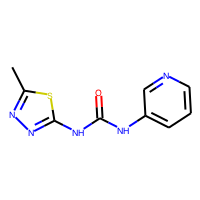
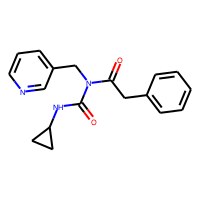
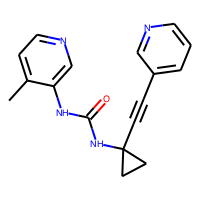
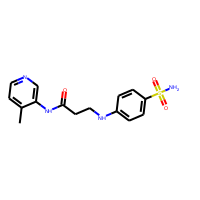
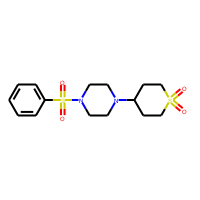
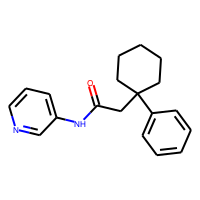
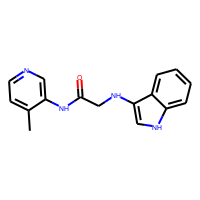
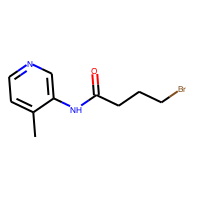
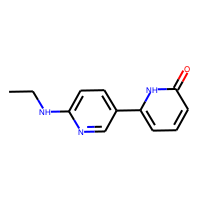
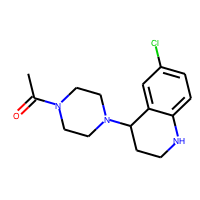
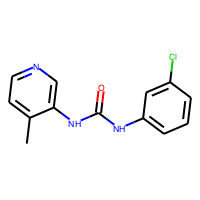
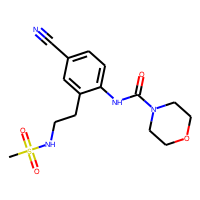
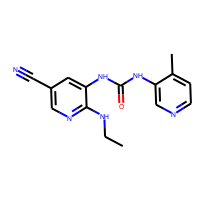
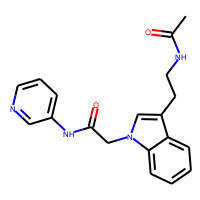
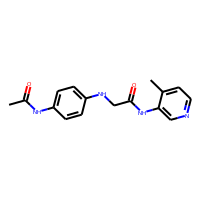
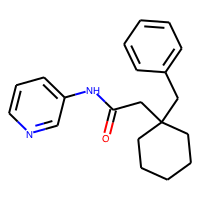
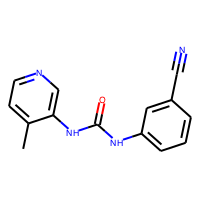
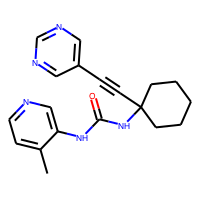
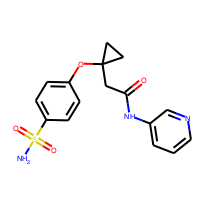
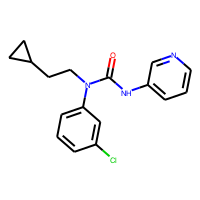
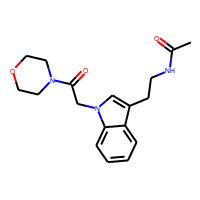
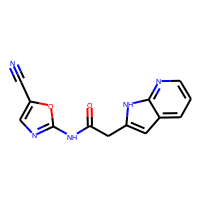
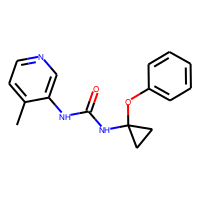
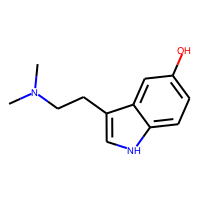
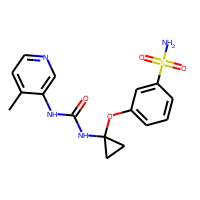
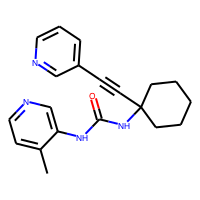
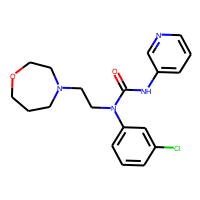
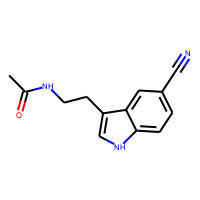
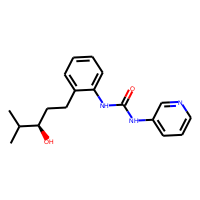
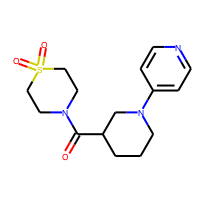
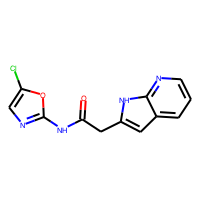
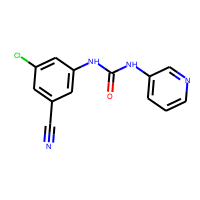
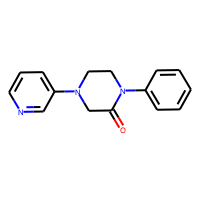
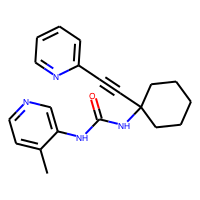
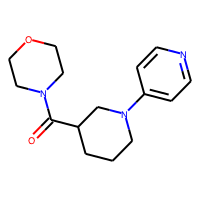
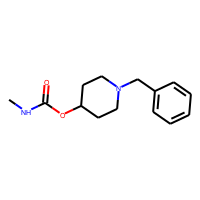
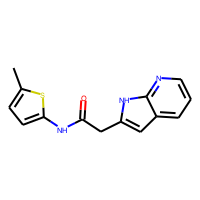
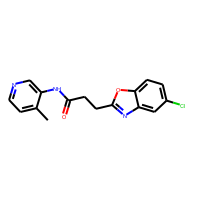
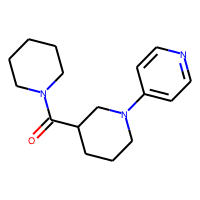
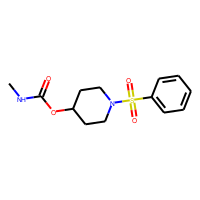
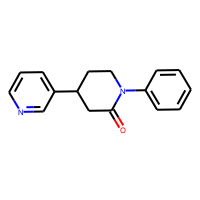
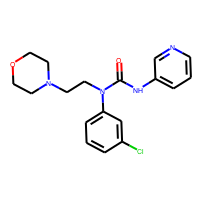
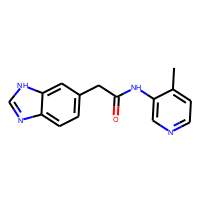
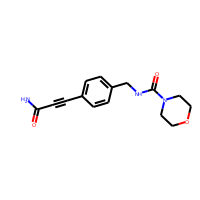
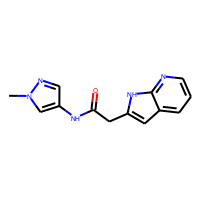
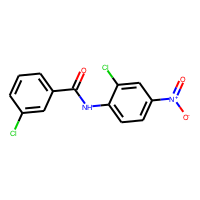
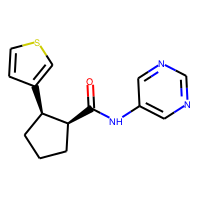
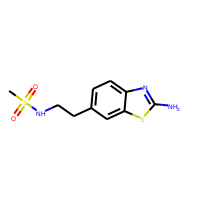
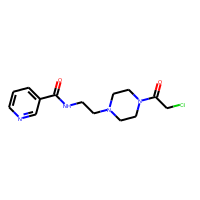
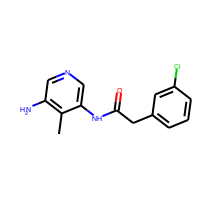
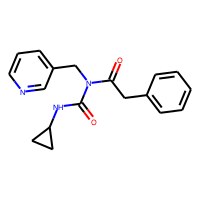
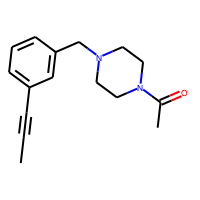
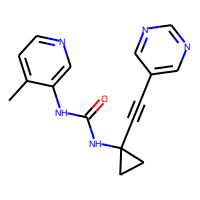
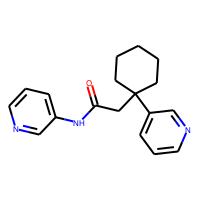
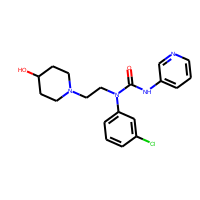
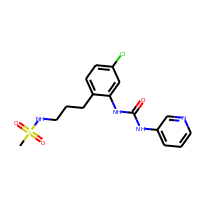
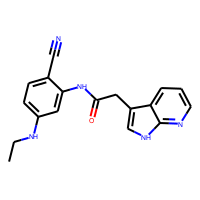
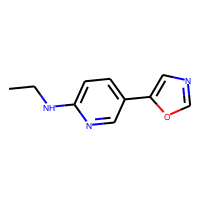
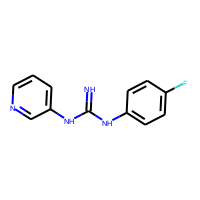
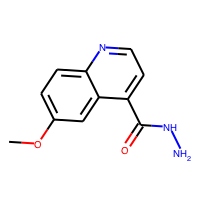

In [74]:
sa_df

In [76]:
cols = sa_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('ROMol')))
sa_df = sa_df.reindex(columns= cols)

,ROMol,SMILES,MW,SCORE,BB,CID,LINK,ROUTE
0,,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,0.979,"[EN300-17271, EN300-21243]",ALE-HEI-f28-4,https://covid.postera.ai/covid/submissions/f28...,./covid_synthesis_plans/ALE-HEI-f28-4.html
1,,O=C(Cc1ccccc1)N(Cc1cccnc1)C(=O)NC1CC1,309.147727,0.812,"[EN300-15619, EN300-18992]",MIC-SGC-657-1,https://covid.postera.ai/covid/submissions/657...,./covid_synthesis_plans/MIC-SGC-657-1_1.html
2,,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,0.973,[EN300-51191],CHR-SOS-6c4-11,https://covid.postera.ai/covid/submissions/6c4...,./covid_synthesis_plans/CHR-SOS-6c4-11.html
3,,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,0.681,[EN300-51191],GAB-REV-70c-3,https://covid.postera.ai/covid/submissions/70c...,./covid_synthesis_plans/GAB-REV-70c-3.html
4,,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.940,"[EN300-31943, EN300-42287]",GIA-UNK-eaa-2,https://covid.postera.ai/covid/submissions/eaa...,./covid_synthesis_plans/GIA-UNK-eaa-2.html
5,,O=C(CC1(c2ccccc2)CCCCC1)Nc1cccnc1,294.173213,0.943,"[EN300-52411, EN300-21243]",CHR-SOS-f73-1,https://covid.postera.ai/covid/submissions/f73...,./covid_synthesis_plans/CHR-SOS-f73-1.html
6,,Cc1ccncc1NC(=O)CNc1c[nH]c2ccccc12,280.132411,0.498,[EN300-65474],GAB-REV-70c-17,https://covid.postera.ai/covid/submissions/70c...,./covid_synthesis_plans/GAB-REV-70c-17.html
7,,Cc1ccncc1NC(=O)CCCBr,256.021125,0.943,"[EN300-20415, EN300-51191]",ALE-HEI-f28-12,https://covid.postera.ai/covid/submissions/f28...,./covid_synthesis_plans/ALE-HEI-f28-12.html
8,,CCNc1ccc(-c2cccc(=O)[nH]2)cn1,215.105862,0.926,[EN300-109418],ANN-UNI-263-1,https://covid.postera.ai/covid/submissions/263...,./covid_synthesis_plans/ANN-UNI-263-1.html
9,,CC(=O)N1CCN(C2CCNc3ccc(Cl)cc32)CC1,293.129490,0.926,"[EN300-80438, EN300-33920]",KIM-UNI-7d1-4,https://covid.postera.ai/covid/submissions/7d1...,./covid_synthesis_plans/KIM-UNI-7d1-4.html

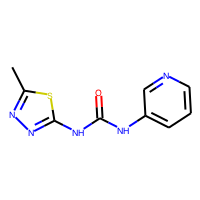
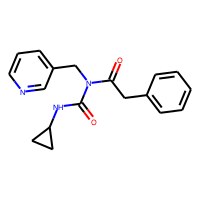
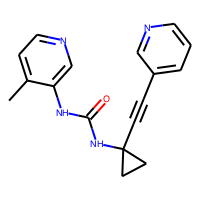
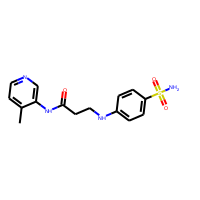
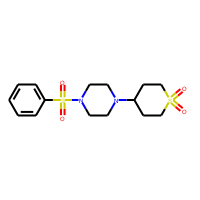
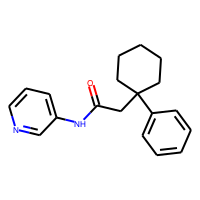
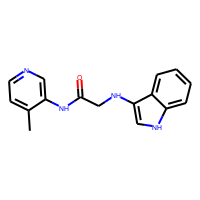
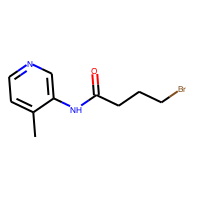
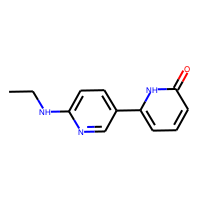
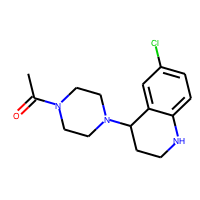
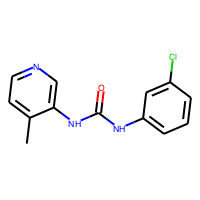
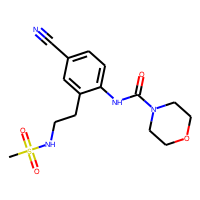
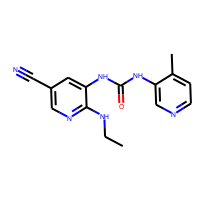
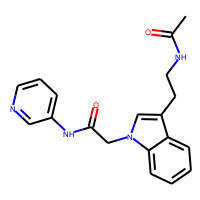
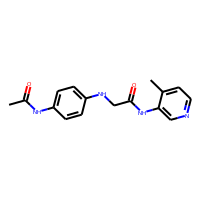
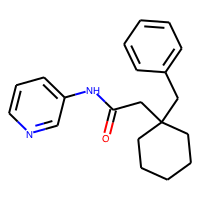
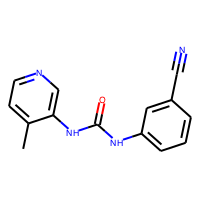
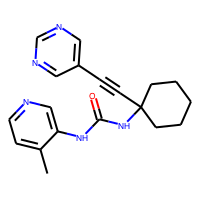
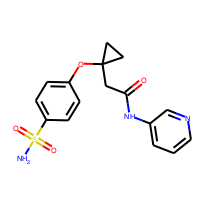
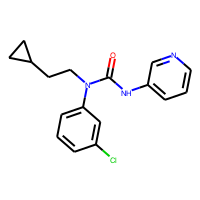
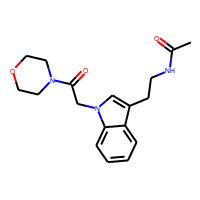
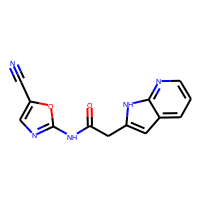
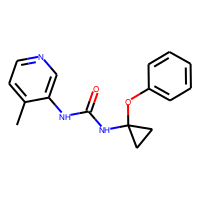
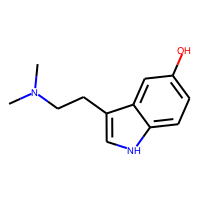
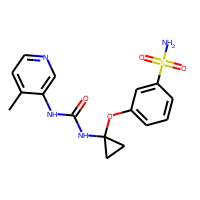
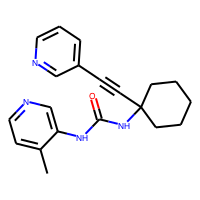
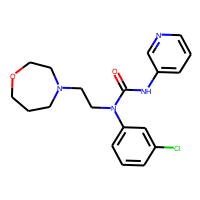
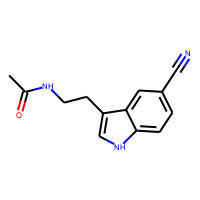
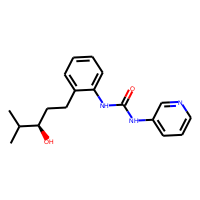
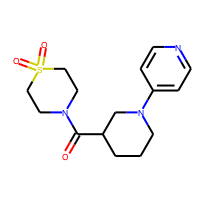
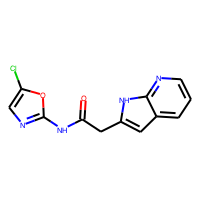
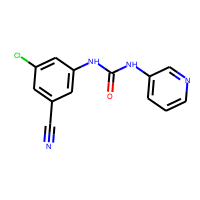
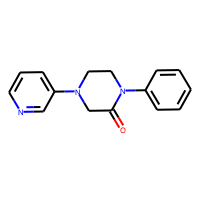
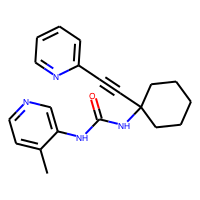
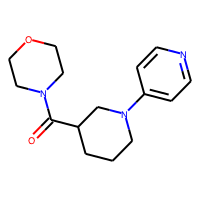
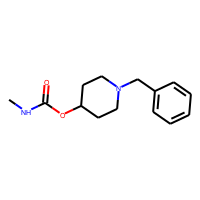
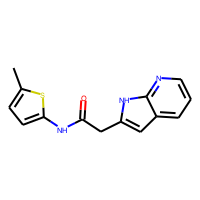
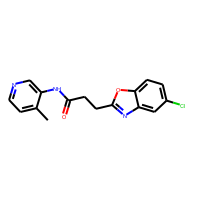
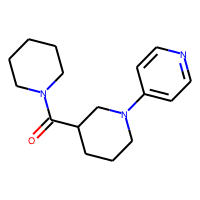
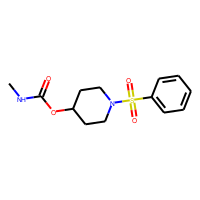
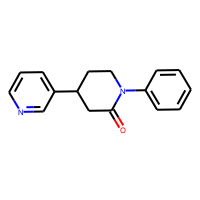
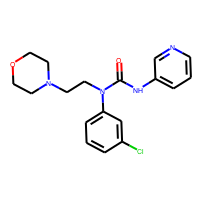
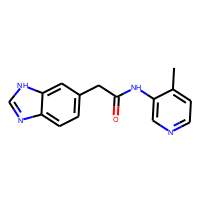
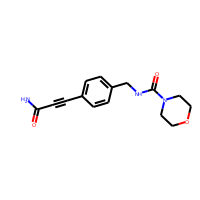
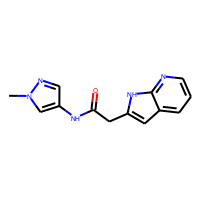
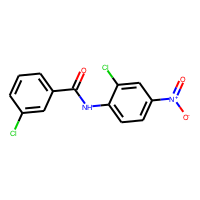
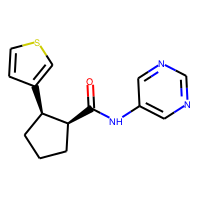
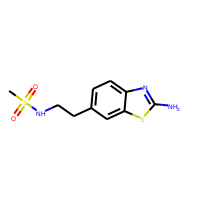
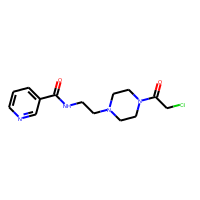
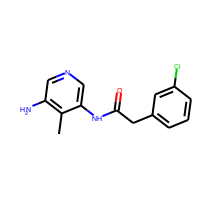
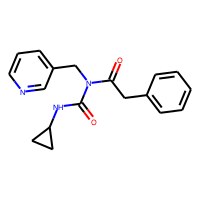
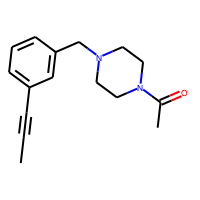
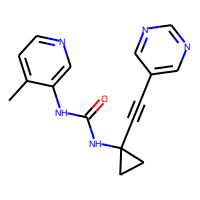
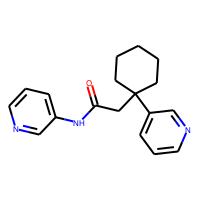
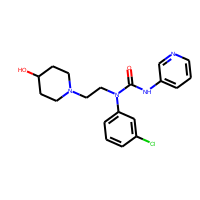
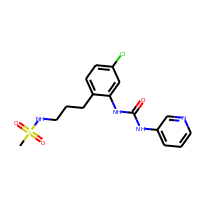
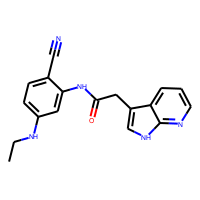
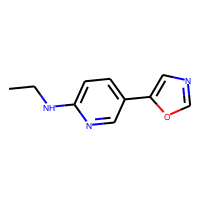
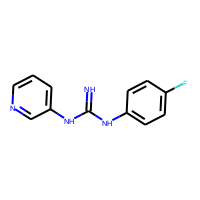
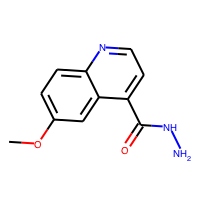

In [77]:
sa_df

In [82]:
Chem.PandasTools.SaveXlsxFromFrame(sa_df, 'covid_SA_file.xlsx', size=(100, 100))